In [1]:
# reading data from file
import pandas as pd

# ploting
import seaborn as sns
import matplotlib.pyplot as plt

# neaded machine learning algorithms
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# needed function for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
class CreditCardFraudClassifier:
    def __init__(self, data_path="creditcard.csv"):
        self.data = pd.read_csv(data_path)

    def info(self):
        """
        This function shows usefull information about
        dataset
        """
        print(self.data.info())

    def describe(self):
        """
        This function shows usefull information about
        dataset
        """
        print(self.data.describe())

    def preprocess(self):
        """preprocess data:
        drop useless features from dataset
        normalize data
        and split data for train and test
        """
        self.data = self.data.drop(["Time"], axis=1)
        scaler = StandardScaler()
        self.data["Amount"] = scaler.fit_transform(
            self.data["Amount"].values.reshape(-1, 1)
        )
        X = self.data.drop("Class", axis=1)
        y = self.data["Class"]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

    def visualize_kmeans_clusters(self):
        """visuilize data using clustering and other things"""

        print("Clustering (K-Means)".center(40, "-"))
        kmeans = KMeans(
            n_clusters=2, init="k-means++", max_iter=300, n_init=12, random_state=42
        )
        cluster_labels = kmeans.fit_predict(self.X_train)
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x="V1", y="V2", hue=cluster_labels, data=self.X_train, palette="viridis")
        plt.title("K-Means Clustering")
        plt.xlabel("V1")
        plt.ylabel("V2")
        plt.show()

    def test_all_models(self, classifiers: list):
        """test models to find best one"""
        print()
        print("Test All Models:".center(40, "-"))
        for model in classifiers:
            model.fit(self.X_train, self.y_train)
            y_pred = model.predict(self.X_test)
            accuracy = accuracy_score(self.y_test, y_pred)
            print(f"{model.__class__.__name__} Accuracy: {accuracy:.5f}")

In [3]:
credit_card_classifier = CreditCardFraudClassifier()
credit_card_classifier.data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
credit_card_classifier.preprocess()

----------Clustering (K-Means)----------


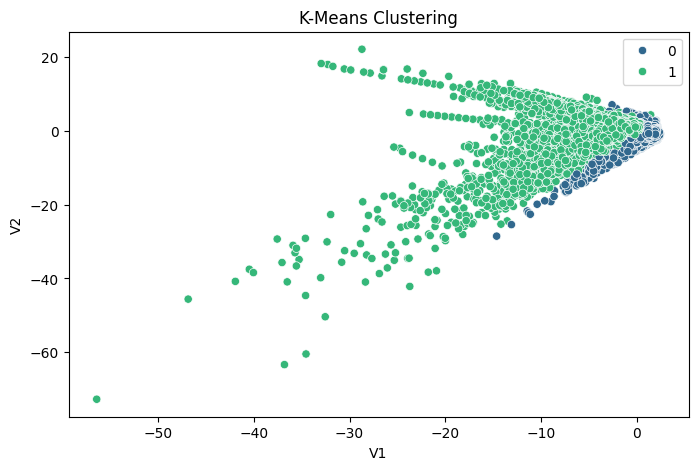

In [6]:
credit_card_classifier.visualize_kmeans_clusters()

In [7]:
classifiers = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    SVC(random_state=42),
]
credit_card_classifier.test_all_models(classifiers)


------------Test All Models:------------
LogisticRegression Accuracy: 0.99912
KNeighborsClassifier Accuracy: 0.99953
SVC Accuracy: 0.99932
